In [521]:
import pandas as pd

df_train = pd.read_csv('train_house.csv')
df_test = pd.read_csv('test.csv')



In [522]:
df_train.drop(columns=['Id'], inplace=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

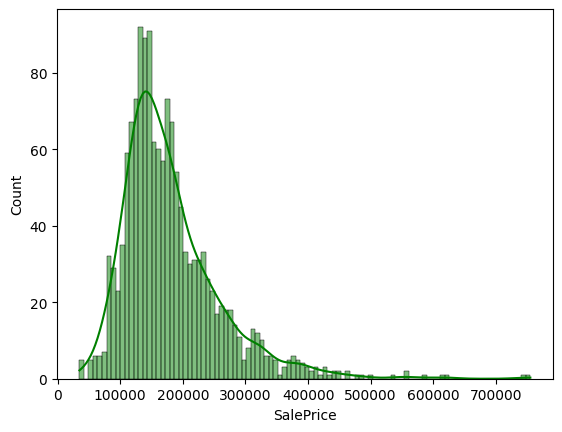

In [523]:
import seaborn as sns

sns.histplot(df_train['SalePrice'], color='g', bins=100, kde = True)

In [524]:
prices = df_train['SalePrice']
df_train.drop(columns=['SalePrice'], inplace=True)
df_train.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [525]:
df_train['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [526]:
feature_names = df_train.columns.to_numpy()

In [527]:
feature_names

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [528]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df_train.select_dtypes(include=['object']).columns

for name in feature_names:
    df_train[name].fillna(df_train[name].mode()[0], inplace = True)
    encoder = LabelEncoder()
    if name in categorical_columns:
        df_train[name] = encoder.fit_transform(df_train[name])

C:\Users\perri\AppData\Local\Temp\ipykernel_10712\738265298.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[name].fillna(df_train[name].mode()[0], inplace = True)
C:\Users\perri\AppData\Local\Temp\ipykernel_10712\738265298.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [529]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

values = scaler.fit_transform(df_train)


In [530]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(values, prices, test_size=0.1, random_state=42)

In [531]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Definisci il modello di base
model = GradientBoostingRegressor(random_state=42)

# Step 2: Definisci il dizionario dei parametri da testare
param_grid = {
    'n_estimators': [100, 200, 300],        # Numero di alberi
    'learning_rate': [0.01, 0.1, 0.2],     # Velocità di apprendimento
    'max_depth': [3, 4, 5],                # Profondità degli alberi
    'min_samples_split': [2, 5, 10],       # Numero minimo di campioni richiesti per dividere un nodo
    'min_samples_leaf': [1, 2, 4]          # Numero minimo di campioni in un foglio
}

# Step 3: Definisci la GridSearchCV con cross-validation (cv=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           verbose=1, n_jobs=-1)

# Step 4: Esegui la GridSearch sul train set
grid_search.fit(X_train, y_train)

# Step 5: Visualizza i migliori parametri trovati dalla GridSearch
print(f"Best parameters: {grid_search.best_params_}")

# Step 6: Addestra il modello con i migliori parametri
model = grid_search.best_estimator_





Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [508]:
y_pred = model.predict(X_test)

In [509]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

rmse = mse**0.5
rmse

28159.142482054827

In [510]:
target_prices = pd.read_csv('sample_submission.csv')
target_prices.drop(columns=['Id'], inplace = True)

In [511]:
df_test.drop(columns=['Id'], inplace = True)

In [512]:
for name in feature_names:
    df_test[name].fillna(df_test[name].mode()[0], inplace = True)
    encoder = LabelEncoder()
    if name in categorical_columns:
        df_test[name] = encoder.fit_transform(df_test[name])

C:\Users\perri\AppData\Local\Temp\ipykernel_10712\2086382974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[name].fillna(df_test[name].mode()[0], inplace = True)
C:\Users\perri\AppData\Local\Temp\ipykernel_10712\2086382974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [513]:
target_prices = target_prices.to_numpy()

In [514]:
scaler2 = StandardScaler()
target_values = scaler.transform(df_test)

In [515]:
predicted_prices = model.predict(target_values)


In [516]:
infered_rmse = mean_squared_error(target_prices, predicted_prices)**0.5
infered_rmse

72860.06482672346

In [517]:
import numpy as np

sum = 0
for index in range(target_prices.size):
    sum += np.abs((predicted_prices[index]-target_prices[index]) / target_prices[index])
sum /= target_prices.size
sum

array([0.30513798])

In [518]:
predicted_prices[0]-target_prices[0]

array([-45215.4076729])